In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
2024-07-08 18:16:59.319 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


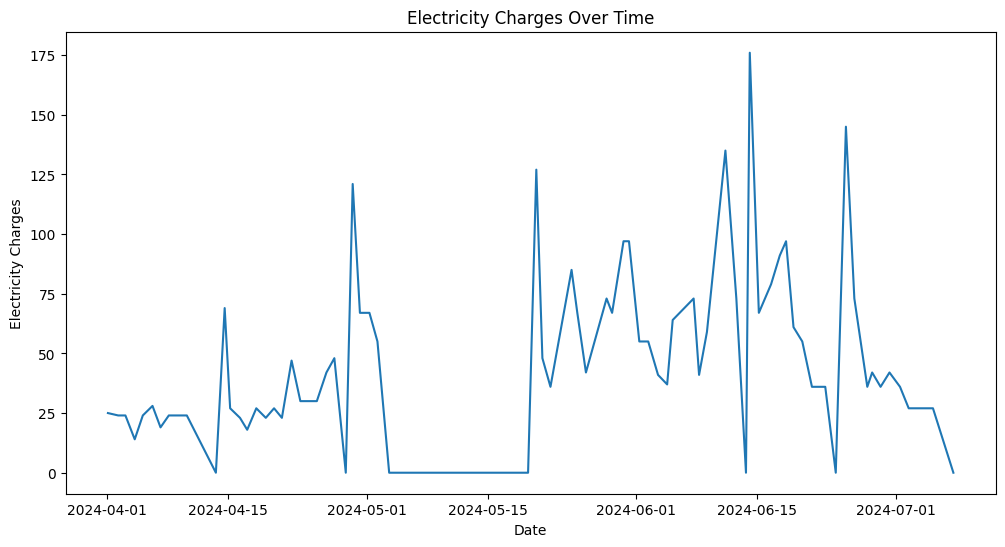

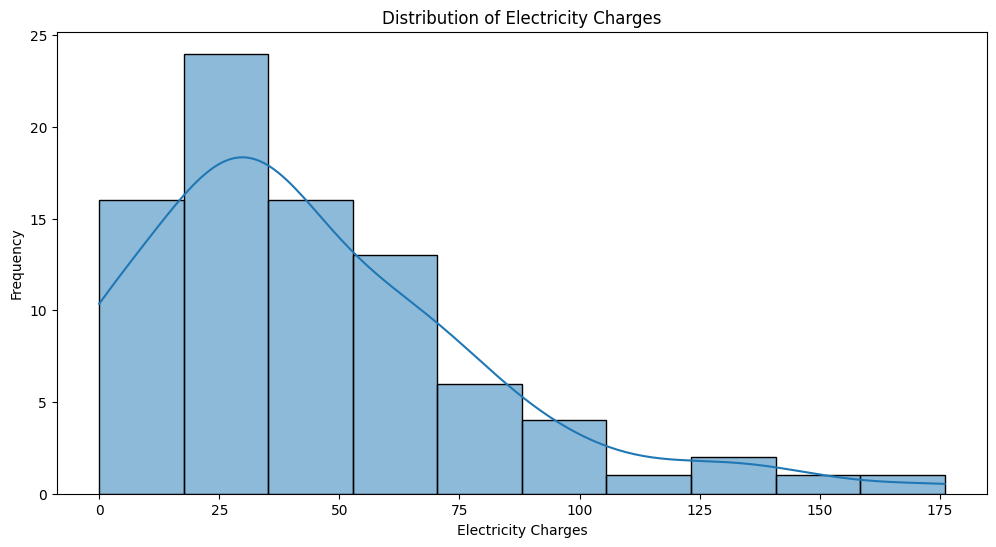

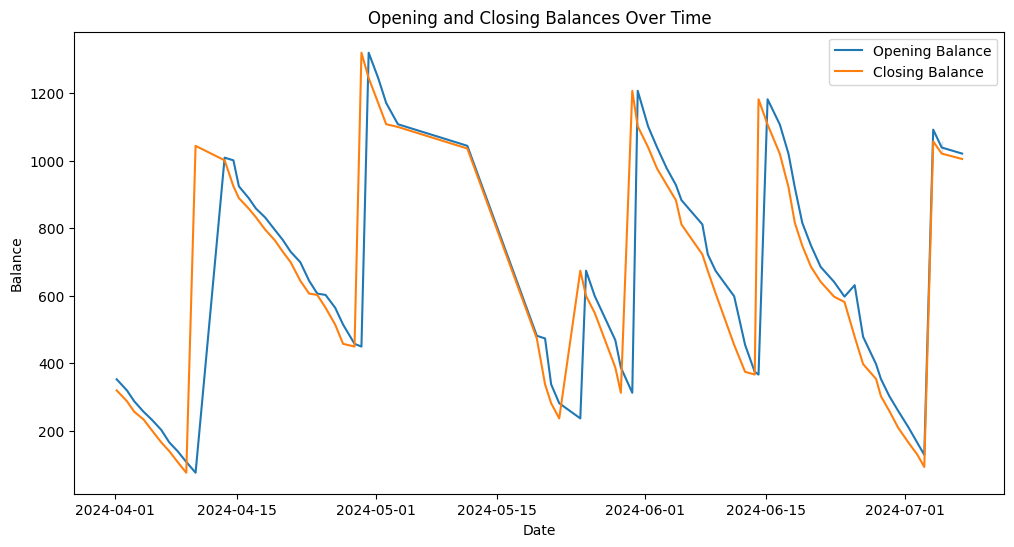

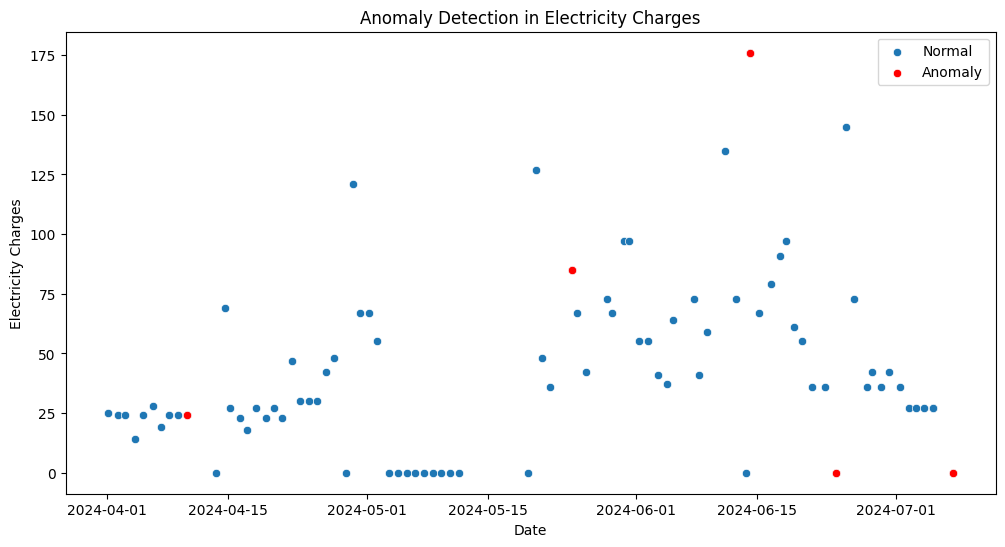

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import streamlit as st

# Load the dataset
file_path = '/content/_MONTHLY CCR REPORT - CONSUMER NO - $CONSUMER_NO-data-2024-07-08 15_38_43.csv'
dataset = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
dataset.fillna(0, inplace=True)
dataset['last_updated_on'] = pd.to_datetime(dataset['last_updated_on'])
numeric_columns = ['AMOUNT', 'ELECTRICITY_CHARGES', 'meter_rent', 'fixed_charges',
                   'credit_debit', 'opening_bal', 'closing_bal', 'current_Reading',
                   'previous_reading', 'arrears', 'recharge', 'invoice']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)

# Exploratory Data Analysis (EDA)
def plot_trends():
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='last_updated_on', y='ELECTRICITY_CHARGES', data=dataset)
    plt.title('Electricity Charges Over Time')
    plt.xlabel('Date')
    plt.ylabel('Electricity Charges')
    st.pyplot(plt)

def plot_distribution():
    plt.figure(figsize=(12, 6))
    sns.histplot(dataset['ELECTRICITY_CHARGES'], kde=True)
    plt.title('Distribution of Electricity Charges')
    plt.xlabel('Electricity Charges')
    plt.ylabel('Frequency')
    st.pyplot(plt)

def plot_balances():
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='last_updated_on', y='opening_bal', data=dataset, label='Opening Balance')
    sns.lineplot(x='last_updated_on', y='closing_bal', data=dataset, label='Closing Balance')
    plt.title('Opening and Closing Balances Over Time')
    plt.xlabel('Date')
    plt.ylabel('Balance')
    plt.legend()
    st.pyplot(plt)

# Consumption Prediction Model
features = ['previous_reading', 'ELECTRICITY_CHARGES', 'meter_rent', 'fixed_charges',
            'credit_debit', 'opening_bal', 'arrears', 'recharge', 'invoice']
target = 'current_Reading'

X = dataset[features]
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Anomaly Detection
anomaly_model = IsolationForest(contamination=0.05, random_state=42)
dataset['anomaly'] = anomaly_model.fit_predict(dataset[features])
anomalies = dataset[dataset['anomaly'] == -1]

def plot_anomalies():
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='last_updated_on', y='ELECTRICITY_CHARGES', data=dataset, label='Normal')
    sns.scatterplot(x='last_updated_on', y='ELECTRICITY_CHARGES', data=anomalies, label='Anomaly', color='r')
    plt.title('Anomaly Detection in Electricity Charges')
    plt.xlabel('Date')
    plt.ylabel('Electricity Charges')
    plt.legend()
    st.pyplot(plt)

# Streamlit Dashboard
st.title('Electricity Consumption Analysis and Prediction')

st.subheader('Electricity Charges Over Time')
plot_trends()

st.subheader('Distribution of Electricity Charges')
plot_distribution()

st.subheader('Opening and Closing Balances Over Time')
plot_balances()

st.subheader('Anomaly Detection in Electricity Charges')
plot_anomalies()

st.subheader('Model Performance')
st.write(f'Root Mean Squared Error: {rmse}')
